# Stabilität Eulerverfahren

Bestimmte DGL lassen sich mit impliziten Verfahren besser lösen als mit expliziten Verfahren. Diese DGL bezeichnen wir als **steif**.

Das liegt vor allem an der hohen Lipschitzkonstante, die für explizite Verfahren eine sehr kleine Schrittweite bedeutet $\left(h<\frac{2}{\lambda}\right)$.

## Stabilität für die Dahlquist-Gleichung

Um ein Gefühl dafür zu bekommen, wann eine DGL steif ist, und wie das die Performanz der expliziten Löser beeinflusst, schauen wir uns die Dahlquist-Gleichung, also die DGL der Form $y'=-λy,λ>0,y_0=1$ mit der exakten Lösung $y(t)=e^{(-λt)}$, an und variieren den Faktor λ sowie die Schrittweite h.

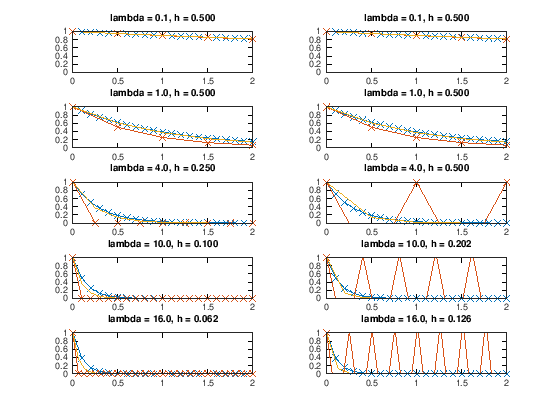

In [1]:
%% implicit vs explicit Euler method

clear

y0 = 1;
tspan = [0,2];
lambda_selection = [0.1, 1, 4, 10, 16];

% parameters for graphical output
p = 1;
m = length(lambda_selection);

% Schrittweite fuer implizite Loesung
h_i = 0.1;

for lambda = lambda_selection

    %% varying iteration steps for explicit solution depending on Lipschitz constant
    Lip = 2/abs(lambda);
    h_selection = [0.5 * Lip, 1.01 * Lip];
    n = length(h_selection);
    
    %% explicit ODE
    f = @(t,y) -lambda * y;

    for h = h_selection
        
        %% solving with explicit Euler method
        if h > 0.5
            h = 0.5;
        end
        t = tspan(1):h:tspan(2);
        y_e = zeros(size(t));
        y_e(1) = y0;
        for i = 2:length(t)
            y_e(i) = y_e(i-1) + h * f(t(i-1),y_e(i-1));
        end

        %% solving with implicit Euler method
        t_i = tspan(1):h_i:tspan(2);
        y_i=zeros(size(t_i));
        y_i(1)=y0;
        for i = 2:length(t_i)
            y_i(i) = y_i(i-1) / (1+h_i*lambda);
        end

        %% graphical output
        subplot(m,n,p);
        plot(t_i,y_i,'x-',t,y_e,'x-',t,exp(-lambda*t));
        if lambda > 0
            ylim([0 1])
        end
        xlim([0 2])
        title(sprintf('lambda = %.1f, h = %.3f', lambda, h))
        p = p + 1;
        
    end
end

Variieren Sie nun die Parameterauswahl in `lambda_selection` und `h_selection`.

- Wie ändert sich die Lösung?
- Warum ist `h_selection = [0.5 * Lip, 1.01 * Lip];` abhängig von `lambda` gewählt? Was passiert, wenn `h` unabhängig von `lambda` gewählt wird? Was, wenn `h` für das explizite Verfahren nur minimal kleiner als $\frac{2}{|\lambda|}$ ist?
- Wann ist das explizite Verfahren nicht mehr hilfreich? Wie 'steif' sieht die zugehörige Funktion aus?

## Stabilität für andere Gleichungen

Ein weiteres klassisches Stabilitätsproblem ist die inhomogene Prothero-Robinson-Gleichung mit $y'=-λ(y-g)+g',λ>0,y_0=1$. $g(t)$ ist eine glatte Funktion.

- Weisen Sie nach, dass $y(t)=g(t)+e^{(-λt)} (y_0-g_0)$ die exakte Lösung der DGL ist.

Da $e^{(-λt)}$ für $λ≫1$ schnell gegen 0 geht, sollte die Lösung schnell gegen $g(t)$ konvergieren.

Für $g(t) = const.$ lautet die DGL $y' = -\lambda (y - g)$ mit der Lösung $y(t) = g + e^{(-λt)}$, die gegen $g$ konvergiert. Diese lässt sich leicht für das implizite Eulerverfahren umformen zu $y_{k+1} = \frac{y_k + h\lambda g}{1+h\lambda}$.

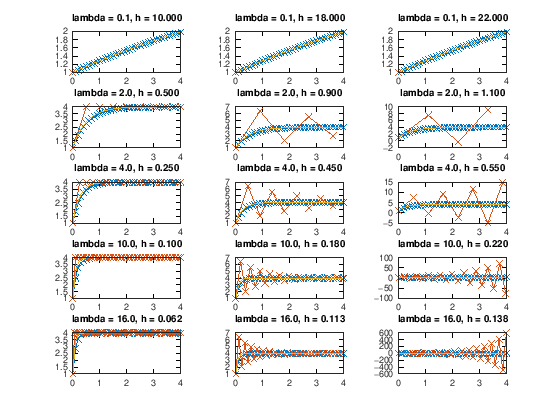

In [2]:
%% implicit vs explicit Euler method

clear

y0 = 1;
tspan = [0,4];
lambda_selection = [0.1, 2, 4, 10, 16];
g = @(t) 4;
g0 = g(0);

% parameters for graphical output
p = 1;
m = length(lambda_selection);

% iteration steps for implicit solution
h_i = 0.1;


for lambda = lambda_selection

    %% varying iteration steps for explicit solution depending on Lipschitz constant
    Lip = 2/abs(lambda);
    h_selection = [0.5 * Lip, 0.9 * Lip, 1.1 * Lip];
    n = length(h_selection);
    
    %% explicit ODE, calculating g' with finite difference
    f = @(t,y) - lambda* (y - g(t)) + (g(t+h_i)-g(t-h_i))/(2*h_i);

    for h = h_selection
        
        %% solving with explicit Euler method
        t = tspan(1):h:tspan(2);
        y_e = zeros(size(t));
        y_e(1) = y0;
        for i = 2:length(t)
            y_e(i) = y_e(i-1) + h * f(t(i-1),y_e(i-1));
        end

        %% solving with implicit Euler method
        t_i = tspan(1):h_i:tspan(2);
        y_i=zeros(size(t_i));
        y_i(1)=y0;
        for i = 2:length(t_i)
            y_i(i) = ( y_i(i-1) + h_i*lambda*g(t_i(i))) / (1+h_i*lambda);
        end

        %% graphical output
        subplot(m,n,p);
        plot(t_i,y_i,'x-',t,y_e,'x-',t_i, g(t_i) + exp(-lambda*t_i)*(y0-g0));
        %xlim([0 tspan(2)])
        %ylim([-4 4])
        title(sprintf('lambda = %.1f, h = %.3f', lambda, h))
        p = p + 1;
        
    end
end

- Variieren Sie nun `g`. Können Sie $g(t) = 4 t^2$ implementieren und die DGL lösen?